In [1]:
# 先导入库
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection

### 一、概述
#### 1.matplotlib的三层api
matplotlib的基础逻辑是，用Artist对象在画布(canvas)上绘制(Render)图形。就和人作画的步骤类似：

- 准备一块画布或画纸
- 准备好颜料、画笔等制图工具
- 作画

所以matplotlib有三个层次的API：

- `matplotlib.backend_bases.FigureCanvas`代表了绘图区，所有的图像都是在绘图区完成的
- `matplotlib.backend_bases.Renderer`代表了渲染器，可以近似理解为画笔，控制如何在 FigureCanvas 上画图。
- `matplotlib.artist.Artist`代表了具体的图表组件，即调用了Renderer的接口在Canvas上作图。

前两者处理程序和计算机的底层交互的事项，第三项Artist就是具体的调用接口来做出我们想要的图，比如图形、文本、线条的设定。故`matplotlib.artist.Artist`类是我们绘图的重点.

#### 2.Artist的分类
两种类型包括:`primitive`和`containor`.

- `primitive`是基本要素，它包含一些我们要在绘图区作图用到的标准图形对象，如曲线Line2D，文字text，矩形Rectangle，图像image等。
- `container`是容器，即用来装基本要素的地方，包括图形figure、坐标系Axes和坐标轴Axis。他们之间的关系如下图所示：

可视化中常见的artist类可以参考这张[表格](https://datawhalechina.github.io/fantastic-matplotlib/第二回：艺术画笔见乾坤/index.html).

### 二、基本元素-primitives]

#### 1.2DLines
在matplotlib中曲线的绘制，主要是通过类 `matplotlib.lines.Line2D` 来完成的。

matplotlib中线`-line`的含义：它表示的可以是连接所有顶点的实线样式，也可以是每个顶点的标记。此外，这条线也会受到绘画风格的影响.[参数参考](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html)

a.设置Line2D的属性

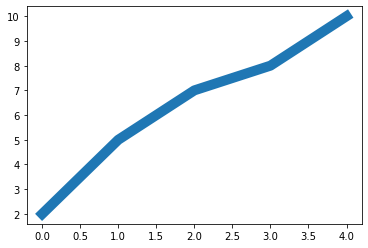

In [2]:
# 1) 直接在plot()函数中设置
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y, linewidth=10); # 设置线的粗细参数为10

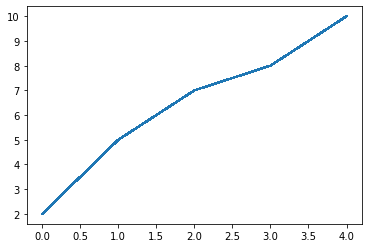

In [3]:
# 2) 通过获得线对象，对线对象进行设置
x = range(0,5)
y = [2,5,7,8,10]
line, = plt.plot(x, y, '-') # 这里等号坐标的line,是一个列表解包的操作，目的是获取plt.plot返回列表中的Line2D对象
line.set_antialiased(False); # 关闭抗锯齿功能

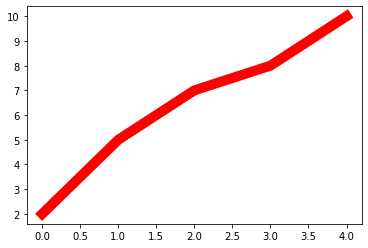

In [4]:
# 3) 获得线属性，使用setp()函数设置
x = range(0,5)
y = [2,5,7,8,10]
lines = plt.plot(x, y)
plt.setp(lines, color='r', linewidth=10);

b.如何绘制lines

(1) 绘制直线line

- plot方法
- Line2D对象绘制

[<matplotlib.lines.Line2D object at 0x7f78c3971450>, <matplotlib.lines.Line2D object at 0x7f78c39716d0>]


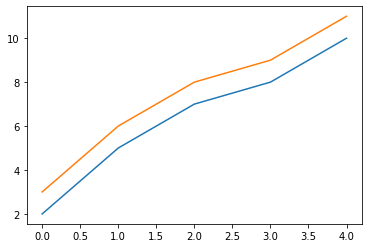

In [5]:
# 1. plot方法绘制
x = range(0,5)
y1 = [2,5,7,8,10]
y2= [3,6,8,9,11]

fig,ax= plt.subplots()
ax.plot(x,y1)
ax.plot(x,y2)
print(ax.lines); # 通过直接使用辅助方法画线，打印ax.lines后可以看到在matplotlib在底层创建了两个Line2D对象

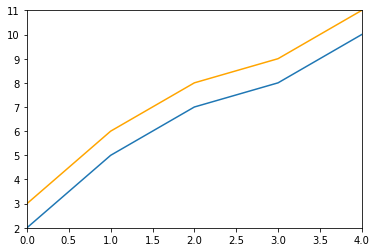

In [6]:
# 2. Line2D对象绘制

x = range(0,5)
y1 = [2,5,7,8,10]
y2= [3,6,8,9,11]
fig,ax= plt.subplots()
lines = [Line2D(x, y1), Line2D(x, y2,color='orange')]  # 显式创建Line2D对象
for line in lines:
    ax.add_line(line) # 使用add_line方法将创建的Line2D添加到子图中
ax.set_xlim(0,4)
ax.set_ylim(2, 11);

(2) errorbar绘制误差折线图

- pyplot里有个专门绘制误差线的功能，通过`errorbar`类实现

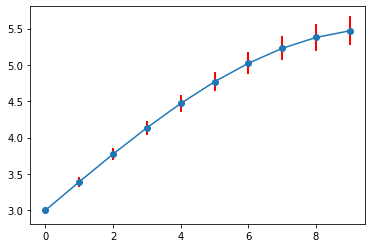

In [9]:
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)
plt.errorbar(x,y+3,yerr=yerr,fmt='o-',ecolor='r',elinewidth=2);#前两个参数表示图像整体的移动

#### 2.patches
- `matplotlib.patches.Patch`类是二维图形类，并且它是众多二维图形的父类，它的所有子类见[matplotlib.patches API](https://matplotlib.org/stable/api/patches_api.html)
- 本小节重点讲述三种最常见的子类，矩形，多边形和楔形

a.矩形

矩形类通过锚点xy及其宽度和高度生成。在实际中最常见的矩形图是hist直方图和bar条形图。

(1) hist直方图

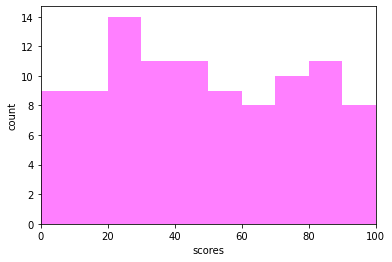

In [13]:
# hist绘制直方图
x=np.random.randint(0,100,100) #生成[0-100)之间的100个数据,即 数据集
bins=np.arange(0,101,10) #设置连续的边界值，即直方图的分布区间[0,10),[10,20)...
plt.hist(x,bins,color='fuchsia',alpha=0.5)#alpha设置透明度，0为完全透明
plt.xlabel('scores')
plt.ylabel('count')
plt.xlim(0,100); #设置x轴分布范围 plt.show()

(2) 柱状图

有两种方式绘制柱状图:
- bar绘制柱状图
- Rectangle矩形绘制柱状图

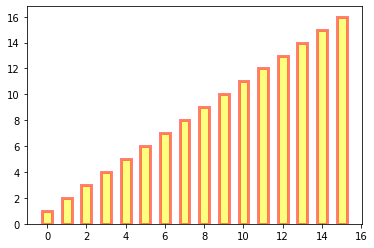

In [14]:
# bar绘制柱状图
y = range(1,17)
plt.bar(np.arange(16), y, alpha=0.5, width=0.5, color='yellow', edgecolor='red', label='The First Bar', lw=3);

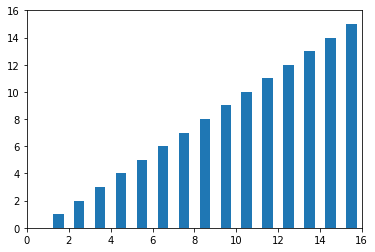

In [15]:
# Rectangle矩形类绘制柱状图
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(1,17):
    rect =  plt.Rectangle((i+0.25,0),0.5,i)
    ax1.add_patch(rect)
ax1.set_xlim(0, 16)
ax1.set_ylim(0, 16);

b.Polygon-多边形

matplotlib.patches.Polygon类是多边形类.它的构造函数：

`class matplotlib.patches.Polygon(xy, closed=True, **kwargs)`

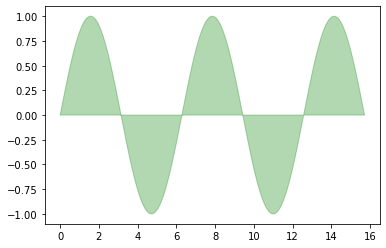

In [16]:
# 用fill来绘制图形
x = np.linspace(0, 5 * np.pi, 1000)
y1 = np.sin(x)
y2 = np.sin(2 * x)
plt.fill(x, y1, color = "g", alpha = 0.3);

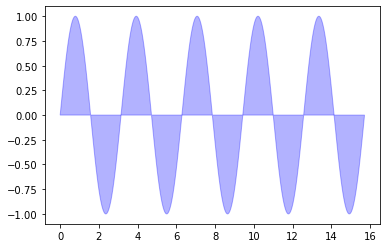

In [17]:
plt.fill(x,y2,color = "b", alpha = 0.3)

c. Wedge-契形

- matplotlib.patches.Wedge类是楔型类。其基类是matplotlib.patches.Patch，它的构造函数：

`class matplotlib.patches.Wedge(center, r, theta1, theta2, width=None, **kwargs)`
- 一个Wedge-楔型 是以坐标x,y为中心，半径为r，从θ1扫到θ2(单位是度)。
- 如果宽度给定，则从内半径r -宽度到外半径r画出部分楔形。wedge中比较常见的是绘制饼状图。
- 制作数据x的饼图，每个楔子的面积用x/sum(x)表示。

两种方法绘制饼图:pie,wedge

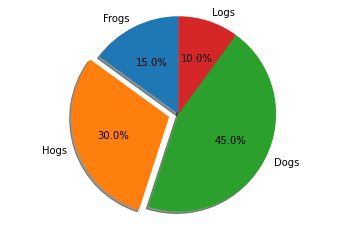

In [18]:
# pie绘制饼状图
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal'); # Equal aspect ratio ensures that pie is drawn as a circle.

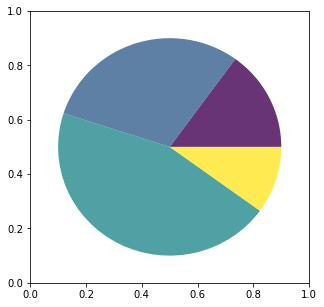

In [19]:
# wedge绘制饼图
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
theta1 = 0
sizes = [15, 30, 45, 10] 
patches = []
patches += [
    Wedge((0.5, 0.5), .4, 0, 54),
    Wedge((0.5, 0.5), .4, 54, 162),
    Wedge((0.5, 0.5), .4, 162, 324),
    Wedge((0.5, 0.5), .4, 324, 360),
]
colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.8)
p.set_array(colors)
ax1.add_collection(p);

### 3.colletions
collections类是用来绘制一组对象的集合，collections有许多不同的子类，如RegularPolyCollection, CircleCollection, Pathcollection, 分别对应不同的集合子类型。其中比较常用的就是散点图，它是属于PathCollection子类，scatter方法提供了该类的封装，根据x与y绘制不同大小或颜色标记的散点图。

其中最主要的参数是前5个:
- x:数据点x轴的位置
- y:数据点y轴的位置
- s:尺寸大小
- c:可以是单个颜色格式的字符串,也可以是一系列颜色
- marker:标记的类型

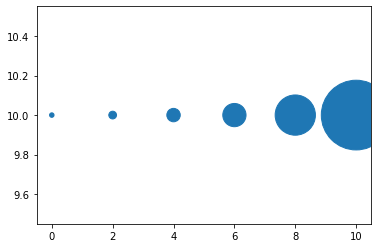

In [21]:
# 用scatter绘制散点图
x = [0,2,4,6,8,10]
y = [10]*len(x)
s = [20*3**n for n in range(len(x))]
plt.scatter(x,y,s=s) ;

#### 4.images
- images是matplotlib中绘制image图像的类，其中最常用的imshow可以根据数组绘制成图像，它的构造函数：

`class matplotlib.image.AxesImage(ax, cmap=None, norm=None, interpolation=None, origin=None, extent=None, filternorm=True, filterrad=4.0, resample=False, **kwargs)`

- imshow根据数组绘制图像

`matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=, filternorm=1, filterrad=4.0, imlim=, resample=None, url=None, *, data=None, **kwargs）`

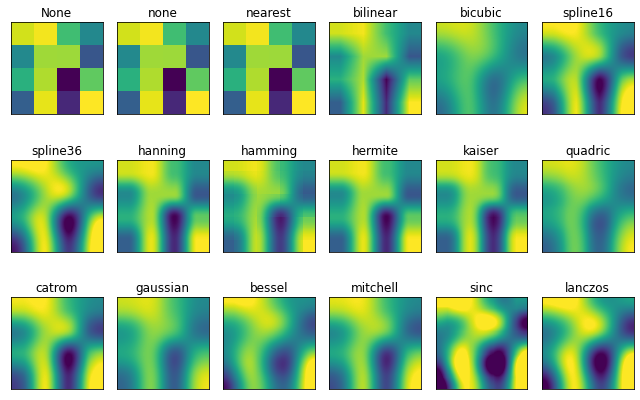

In [22]:
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']


grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout();

### 三、对象容器
- 容器会包含一些要素.同时容器也有自己的属性.

#### 1.Figure容器

`matplotlib.figure.Figure`是Artist最顶层的container对象容器，它包含了图表中的所有元素。一张图表的背景就是在`Figure.patch`的一个矩形Rectangle。

AxesSubplot(0.125,0.536818;0.775x0.343182)
[<AxesSubplot:>, <Axes:>]


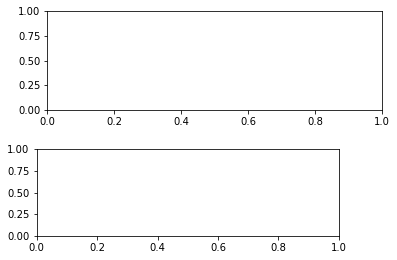

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(211) # 作一幅2*1的图，选择第1个子图
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3]) # 位置参数，四个数分别代表了(left,bottom,width,height)
print(ax1) 
print(fig.axes) # fig.axes 中包含了subplot和axes两个实例, 刚刚添加的

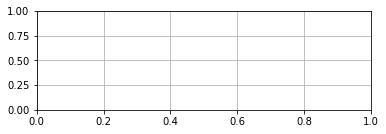

In [24]:
# 历axes里的内容，并且添加网格线：
fig = plt.figure()
ax1 = fig.add_subplot(211)

for ax in fig.axes:
    ax.grid(True)

### 思考题
- primitives 和 container的区别和联系是什么，分别用于控制可视化图表中的哪些要素?
    - primitive是内容要素，画具体的点线面。container是框架设计，用来装基本要素，比如画布figure、子图Axes和轴Axis等。
- 使用提供的drug数据集，对第一列yyyy和第二列state分组求和，画出下面折线图。PA加粗标黄，其他为灰色。图标题和横纵坐标轴标题，以及线的文本暂不做要求。

State  YYYY     KY     OH     PA     VA    WV
0      2010  10453  19707  19814   8685  2890
1      2011  10289  20330  19987   6749  3271
2      2012  10722  23145  19959   7831  3376
3      2013  11148  26846  20409  11675  4046
4      2014  11081  30860  24904   9037  3280


Text(0.0, 1.0, 'Evolution of PA vs other states')

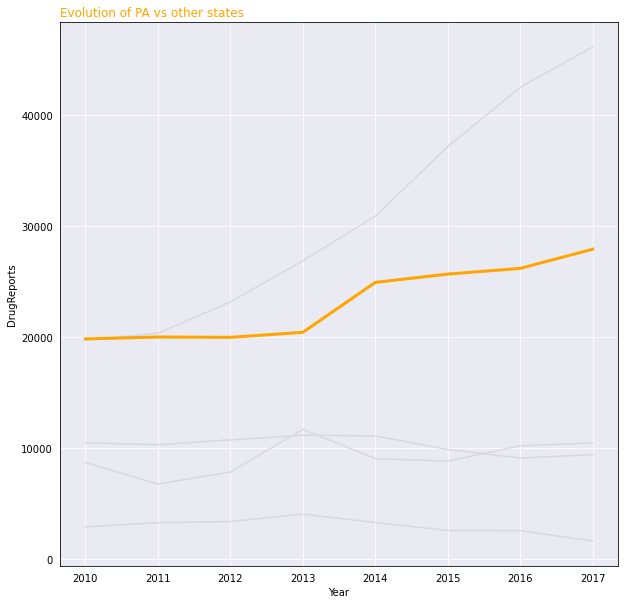

In [31]:
Dataset = pd.read_csv('./Drugs.csv')
group = Dataset.groupby(['YYYY','State']).agg('sum').reset_index()
df = group.pivot(index='YYYY', columns='State', values='DrugReports').reset_index()
print(df.head())
# 创建figure和axes
fig, ax = plt.subplots(figsize=(10, 10))

# 设置网格颜色
ax.grid(True, color='white')

# 设置子图填充
rect = ax.patch
rect.set_facecolor('#eaeaf2')

# 绘制折线图
ax.plot(df['YYYY'], df['KY'], label='KY', color='#d8d8df')  
ax.plot(df['YYYY'], df['OH'], label='OH', color='#d8d8df')  
ax.plot(df['YYYY'], df['PA'], label='PA', color='orange', lw=3)  
ax.plot(df['YYYY'], df['VA'], label='VA', color='#d8d8df')  
ax.plot(df['YYYY'], df['WV'], label='WV', color='#d8d8df')  

# 设置标签
ax.set_xlabel('Year')
ax.set_ylabel('DrugReports')

# 设置刻度
ax.tick_params(tick1On=False)

# 设置标题
ax.set_title('Evolution of PA vs other states', color='orange', loc='left')